# Fashion MNIST

From tensorflow.org

In [2]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## 1. Load Fashion MNIST dataset


In [3]:
# 1.1 Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 2. Exploring data

In [6]:
# 2.1 Shape, labels, etc.
print('Shape of train_images: ', train_images.shape)
print('Shape of test_images: ', test_images.shape)
print('Shape of train_labels: ', train_labels.shape)
print('Labels: ',np.unique(train_labels))

Shape of train_images:  (60000, 28, 28)
Shape of test_images:  (10000, 28, 28)
Shape of train_labels:  (60000,)
Labels:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
# 2.2 Corresponding to the labels 0 - 9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

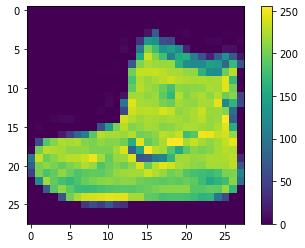

In [8]:
# 2.3 One data point
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 3. Pre-processing

In [9]:
# 3.1 Scale features to range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

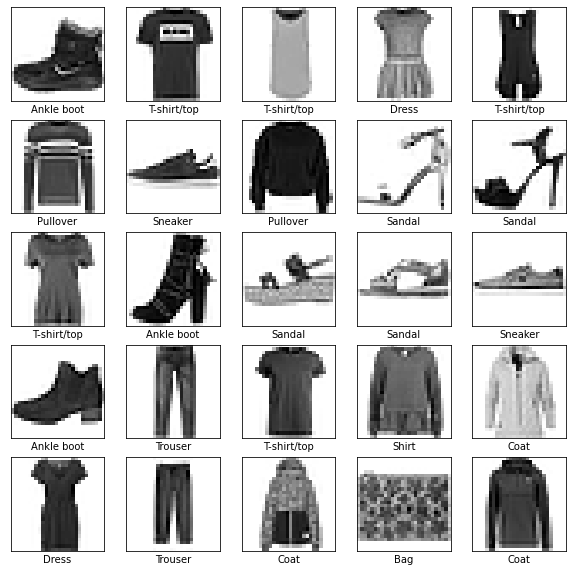

In [10]:
# 3.2 Visualize
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. Model specification

In [11]:
# 4.1 Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
# 4.2 Loss function, metrics, and optimizer -- compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Training the model

In [13]:
# 5.1 Feed model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5045 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3158 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [14]:
# 5.2 Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3535 - accuracy: 0.8782

Test accuracy: 0.8781999945640564


In [16]:
# 5.3 Make prediction
# 5.3.1 Attach a softmax layer to logits of the model's output layer ????????????????????
# Softmax is easier to interprete
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
# 5.3.2 prediction
predictions = probability_model.predict(test_images)

In [18]:
# 5.3.3 Output: confidence in the labels
predictions[0]

array([1.4126353e-08, 1.6072495e-10, 9.8489783e-10, 1.4285108e-11,
       4.9063100e-09, 4.7945672e-05, 4.0445518e-09, 1.3908866e-03,
       3.2165218e-08, 9.9856120e-01], dtype=float32)

In [19]:
# Should label by the most confident
print('Label with max confidence: ', np.argmax(predictions[0]))
print('Label we predicted: ', test_labels[0])

Label with max confidence:  9
Label we predicted:  9


In [20]:
# 5.4. Visualizing the output/confidence
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

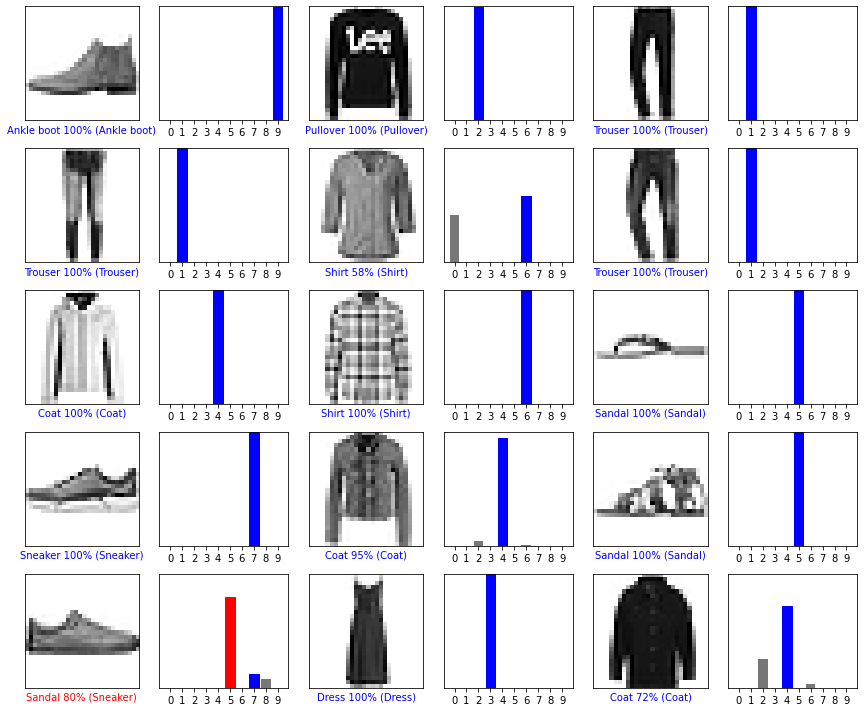

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Using the model

In [22]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4542066e-05 1.4547367e-14 9.9517077e-01 1.1938942e-13 4.3203332e-03
  2.3123341e-10 4.9427414e-04 1.1377272e-14 1.7087146e-12 3.5745587e-15]]


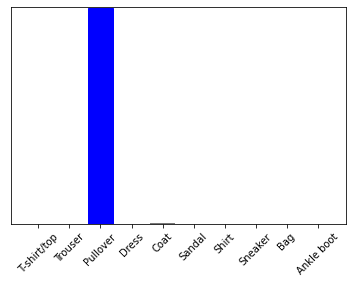

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2